In [296]:
# Natural Language processing Libraries - nltk, spacy, textblob, wordcloud

# NLP - Text data is unsupervised learning data. Text data in form of sentences, paragraphs
# Documents, web, etc.

# Text data needs preprocessing like removing digits, punctuations, special characters,
# emojis, stop words, html links etc.

# Post preprocessing Tokenization which is breaking content into sentences or words.
# Text data must be converted into matrix of numbers. 

# Matrix of Numbers will be input for Algorithms like Machine Learning, Deep learning or
# Text Specific

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk # Natual Language Processing
import re # Regular Expressions Library
import requests # work with urls & web scraping
from bs4 import BeautifulSoup # Web Scraping

In [298]:
# Webscraping content from pages like reviews, posts, updates, etc.
# html based webscraping is done using html5 library, lxml(open source), etc.
# Only public and open sources web pages scrapped.

In [299]:
climatewiki=requests.get("https://en.wikipedia.org/wiki/Climate_change")

In [300]:
climatedf=BeautifulSoup(climatewiki.content,'lxml') # lxml is html type used by wikipedia

In [301]:
climatetxt=climatedf.getText(strip=True)

In [302]:
# Preprocessing of text 
# Remove punctiations, digits, special characters, hyperlinks, etc.
# Regular expressions library or re library is used for preprocessing. Functions like
# re.sub(), re.split(),re.replace(), etc are used for preprocessing

In [303]:
# Replace footnote reference [5] with space
climatetxt=re.sub(r'\[d+\]',' ',climatetxt) # \d+ regex for digit

In [304]:
# Replace text reference in [] brackets with space
climatetxt=re.sub(r'\[w+\]',' ',climatetxt) # \w+ regex for words

In [305]:
# Replace text reference in () brackets with space
climatetxt=re.sub(r'\(w+\)',' ',climatetxt) # \w+ regex for words

In [306]:
# Replace digit reference in () brackets with space
climatetxt=re.sub(r'\(d+\)',' ',climatetxt)

In [307]:
# Replace special characters with space
climatetxt=re.sub('[\(\[].*?[\)\]]',' ',climatetxt)

In [308]:
# Replace digits with space
climatetxt= re.sub('[0-9]+','',climatetxt)

In [309]:
climatetxt=re.sub('-','',climatetxt)

In [310]:
climatetxt=re.sub('\xa0°C','',climatetxt)

In [311]:
climatetxt=re.sub('\'s','',climatetxt)

In [312]:
climatetxt=re.sub('.%','',climatetxt)

In [313]:
# Tokenization - Breaking content into sentences or words
# Sentence Tokenization - Breaking content into sentences, delimiter is full stop
# Word Tokenization - Breaking content into words, delimiter is space

In [314]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [315]:
sentences=sent_tokenize(climatetxt)

In [316]:
len(sentences)

1875

In [317]:
# Text Blob based sentiment analysis generates 2 metrics
# 1) Polarity Score which is a float between -1 to 1. Polarity score is calculated by
# comparing with positive, negative and neutral lexicon of words. 
# >0 is Positive, =0 is Neutral and <0 is Negative

# 2) Subjectivity score lies between 0 and 1. Closer to 1 indicates high personal opinion
# without factual information and closer to 0 indicates low personal opinion. Particularly
# looks for adverbs.

In [318]:
from textblob import TextBlob

In [319]:
s1=TextBlob("Tendulkar is greatest batsman in cricket")

In [320]:
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [321]:
s2=TextBlob("Tendulakar score more than 20000 runs in cricket")

In [322]:
s2.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [323]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [324]:
climatesentence=pd.DataFrame(sentences,columns=['sentence'])

In [325]:
climatesentence['sentiment']=[str(analyze_sentiment(x)) for x in climatesentence.sentence]

In [326]:
climatesentence.sentiment.value_counts()

sentiment
Neutral     1302
Positive     401
Negative     172
Name: count, dtype: int64

In [327]:
climatesentence.head()

,sentence,sentiment
0,Climate change WikipediaJump to contentMain m...,Positive
1,"For natural historical climate trends, seeClim...",Positive
2,"""Global warming"" redirects here.",Neutral
3,"For other uses, seeClimate change andGlobal w...",Negative
4,"TheArctichas warmed the most, and temperatures...",Positive


In [328]:
# NLP is all about words or tokens. Words/tokens are fundamental of Text analysis
climatewords=word_tokenize(climatetxt)

In [329]:
climatewords=[w for w in climatewords if w.isalnum()] # isalnum()-function selects only words

In [330]:
from nltk.corpus import stopwords

In [331]:
# Stopwords are words like is, a, an, the, to, etc. that are not required for analysis
english_stopwords=set(stopwords.words("english"))

In [332]:
# convert words to lowercase as stopwords are in lowercase
climatewords=[w.lower() for w in climatewords]

In [333]:
# Remove stopwords
climatewords=[w for w in climatewords if not str.lower(w) in english_stopwords]

In [334]:
# Select words with more than 2 characters
climatewords=[w for w in climatewords if len(w)>2]

In [335]:
from nltk.probability import FreqDist

In [336]:
wordfreq=FreqDist(climatewords)

In [337]:
wordfreq.most_common(50)

[('climate', 472),
 ('change', 323),
 ('global', 197),
 ('warming', 173),
 ('retrieved', 138),
 ('emissions', 83),
 ('carbon', 82),
 ('energy', 78),
 ('greenhouse', 73),
 ('temperature', 65),
 ('original', 58),
 ('impacts', 53),
 ('earth', 52),
 ('heat', 50),
 ('surface', 48),
 ('chapter', 47),
 ('world', 44),
 ('research', 44),
 ('science', 44),
 ('gas', 43),
 ('land', 42),
 ('also', 42),
 ('report', 42),
 ('summary', 42),
 ('national', 41),
 ('changes', 40),
 ('ice', 38),
 ('ocean', 38),
 ('may', 38),
 ('united', 37),
 ('years', 35),
 ('would', 35),
 ('use', 34),
 ('nations', 34),
 ('atmosphere', 34),
 ('health', 33),
 ('gases', 33),
 ('adaptation', 33),
 ('increased', 31),
 ('assessment', 31),
 ('countries', 31),
 ('since', 30),
 ('effect', 30),
 ('sea', 30),
 ('policymakers', 30),
 ('human', 29),
 ('increase', 29),
 ('agreement', 29),
 ('rise', 28),
 ('ipcc', 28)]

In [338]:
from wordcloud import WordCloud

In [339]:
climate_words=(" ").join(climatewords)

In [340]:
wordcloud=WordCloud(width=1000,height=500,colormap="plasma",
                    max_words=500).generate(str(climate_words))
# Wordcloud helps in identifying frequent words and also check whether preprocessing or
# cleanup done effectively

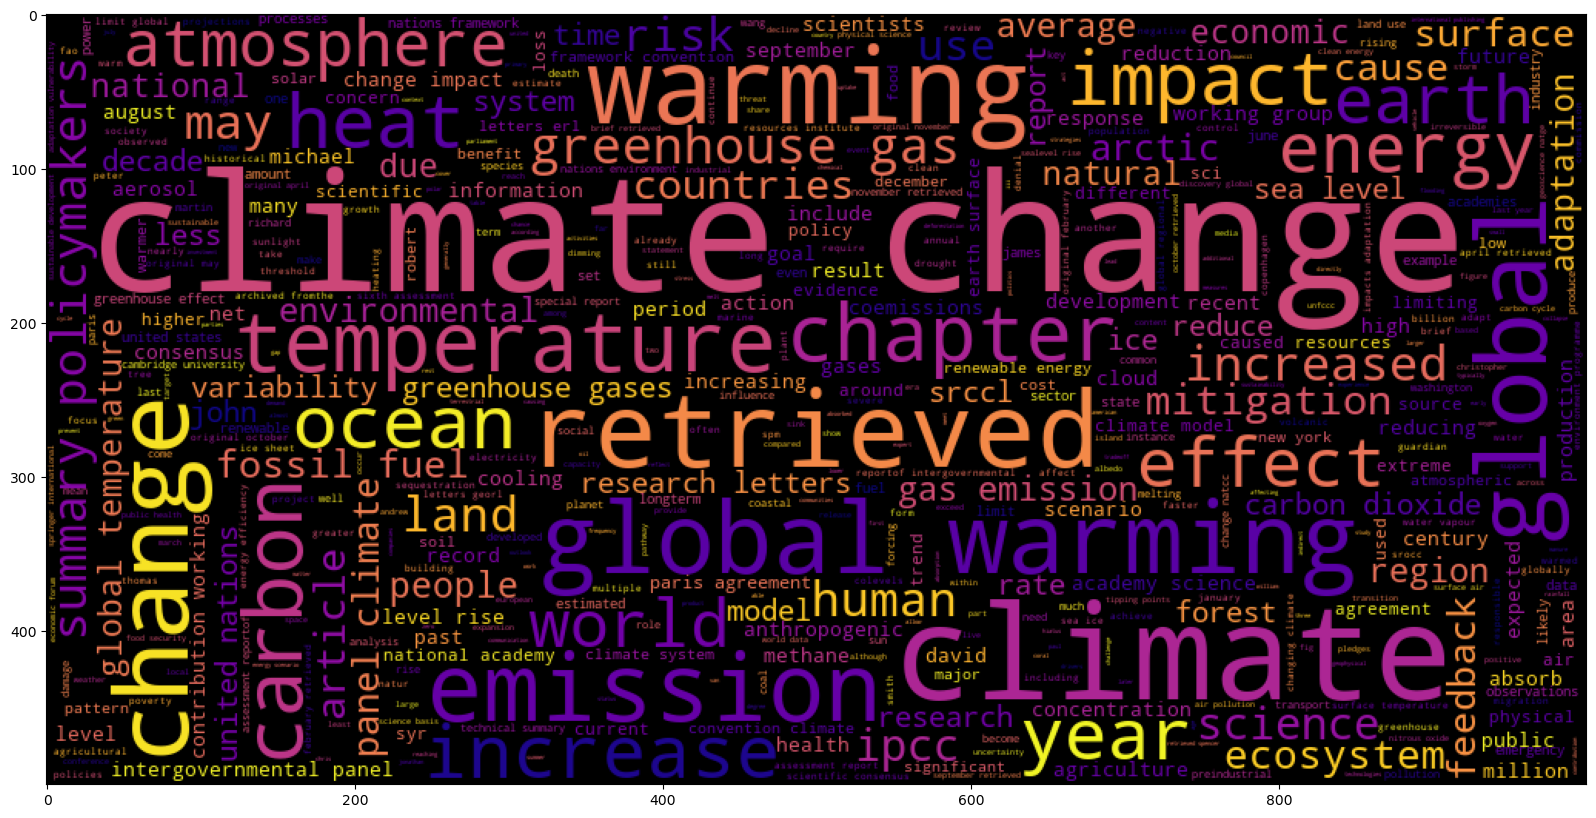

In [341]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [342]:
# Post preprocessing text data or words/tokens must be converted into matrix of numbers
# 3 Types of Matrices of Matrices can be created 
# 1) Document Term Matrix, 2) Term Document Matrix, 3) Term Frequency Inverse Document
# Frequency(TFIDF) Matrix

# Document Term Matrix - Documents/Sentences in Rows and Terms/Words/Tokens in Columns
# Term Document Matrix - Documents/Sentences in Columns and Terms/Words/Tokens in Rows

# All 3 matrices are sparse matrices(many zeroes) in matrix

# Document term matrix values are frequencies

# For all these matrices words/tokens/terms can be:
# Unigrams - Single Words , Bigrams - Two Words  and Trigrams - Three Words

# CountVectorizer() in sklearn python creates Document Term Matrix
# In below Image Replace word Tweet with Document or Sentence

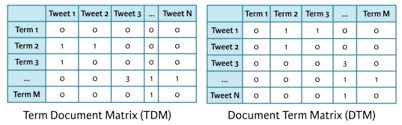

In [344]:
from sklearn.feature_extraction.text import CountVectorizer

In [345]:
DTM=CountVectorizer(max_features=50,stop_words="english")

In [346]:
X=DTM.fit_transform(climatewords)

In [347]:
pd.DataFrame(X.toarray(),columns=DTM.vocabulary_).head()

,climate,change,temperature,global,rise,surface,impacts,health,emissions,ipcc,...,mitigation,research,countries,adaptation,science,retrieved,summary,original,policymakers,chapter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
# Term Frequency Inverse Document Frequency matrix 
# D1 - The car is driven on road
# D2 - The truck is driven on highway

# Post preprocessing
# D1 - car, driven, road
# D2 - truck, driven, highway

# TFIDF for car
# Term Frequency of car - 1/3 = 0.33
# Inverse Document Frequency of Car = log(2/1) = log(2)= 0.6931
# TFIDF of car = 0.33 * 0.6931= 0.2310

# TFIDF for driven
# Term Frequency of driven - 1/3*1/3 = 0.33*0.33=0.1089
# Inverse Document Frequency of driven = log(2/2) = log(1)= 0
# TFIDF of driven = 0.1089* 0= 0

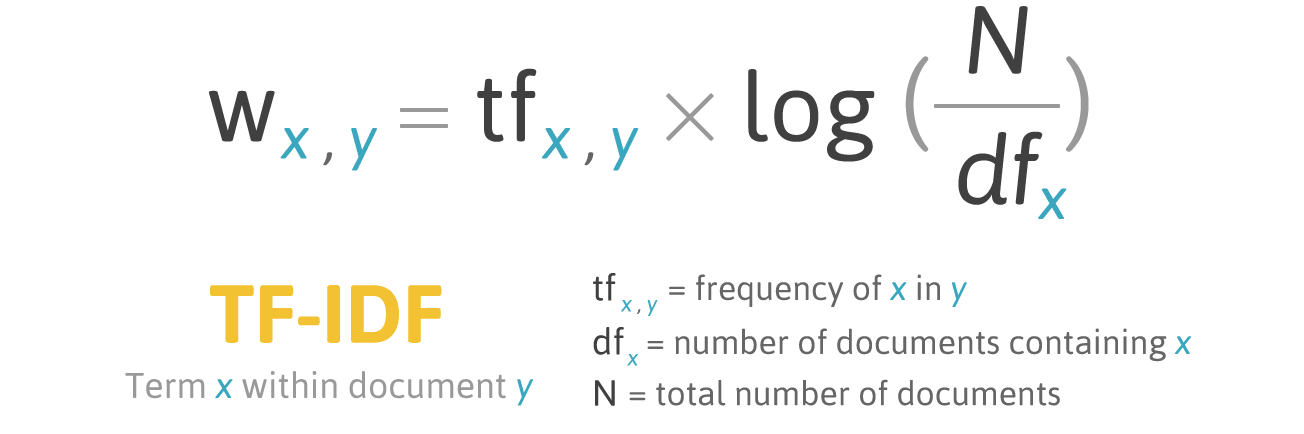

In [350]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [351]:
stop_words=list(stopwords.words("english"))
stop_words.extend("ipcc ar wg sr ch issn scid et al".split())

In [352]:
tfidf=TfidfVectorizer(max_features=20,stop_words=list(stop_words),
                      analyzer="word",ngram_range=(2,2))

In [353]:
X_tfidf=tfidf.fit_transform(climatesentence.sentence)

In [354]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).head(2)

,climate change,global warming,greenhouse gases,carbon dioxide,greenhouse gas,gas emissions,sea level,united nations,panel climate,retrieved january,research letters,archivedfrom original,retrieved april,summary policymakers,intergovernmental panel,doi hdl,pmc pmid,university press,retrieved may,carbon brief
0,0.0,0.0,0.0,0.660551,0.0,0.0,0.452835,0.0,0.598844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
from sklearn.preprocessing import LabelEncoder

In [356]:
y=LabelEncoder().fit_transform(climatesentence.sentiment)

In [357]:
from sklearn.linear_model import LogisticRegression

In [358]:
logisticmodel=LogisticRegression(multi_class="multinomial").fit(X_tfidf,y)

In [359]:
logisticmodel.score(X_tfidf,y)

0.7290666666666666

In [360]:
logistic_pred=logisticmodel.predict(X_tfidf)

In [361]:
pd.crosstab(y,logistic_pred)

col_0,1,2
row_0,,
0,169,3
1,1291,11
2,325,76
